# Workbook for testing ML on 3 years of ozone,aq data and met data from Rathmines

## Importing Modules and Dataset

In [889]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [890]:
df = pd.read_csv('./macehead20062008.csv',thousands=',', low_memory=False)
# You can also open with Excel and take a look at it.

In [891]:
# Print first 5 rows of the dataframe
df.head(4)
df.dtypes

time       int64
hour       int64
ozone    float64
ind      float64
rain      object
ind.1    float64
temp      object
ind.2    float64
wetb      object
dewpt     object
vappr     object
rhum      object
msl       object
ind.3    float64
wdsp      object
ind.4    float64
wddir     object
dtype: object

In [892]:
# Print first 5 rows of the dataframe
df.head(4)

df['rain'] = pd.to_numeric(df['rain'],errors='coerce')
df['temp'] = pd.to_numeric(df['temp'],errors='coerce')
df['wetb'] = pd.to_numeric(df['wetb'],errors='coerce')
df['dewpt'] = pd.to_numeric(df['dewpt'],errors='coerce')
df['vappr'] = pd.to_numeric(df['vappr'],errors='coerce')
df['rhum'] = pd.to_numeric(df['rhum'],errors='coerce')
df['msl'] = pd.to_numeric(df['msl'],errors='coerce')
df['wdsp'] = pd.to_numeric(df['wdsp'],errors='coerce')
df['wddir'] = pd.to_numeric(df['wddir'],errors='coerce')



In [893]:
# Print last 5 rows of the dataframe
df.head(5)

,time,hour,ozone,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,0,1,78.0,0.0,0.3,0.0,8.2,0.0,7.4,6.5,9.7,88.0,1001.4,2.0,34.0,2.0,310.0
1,0,2,80.0,0.0,0.0,0.0,8.0,0.0,7.2,6.3,9.5,88.0,1002.1,2.0,34.0,2.0,310.0
2,0,3,82.0,0.0,0.0,0.0,8.1,0.0,6.7,5.1,8.8,81.0,1003.7,2.0,34.0,2.0,310.0
3,0,4,84.0,0.0,0.0,0.0,8.4,0.0,6.7,4.5,8.4,76.0,1005.7,2.0,33.0,2.0,310.0
4,0,5,84.0,0.0,0.0,0.0,7.6,0.0,6.2,4.4,8.3,79.0,1007.3,2.0,30.0,2.0,310.0


# Lets have a look at the met data indicators

In [894]:
df['ind'].value_counts()

 0.0    25887
-1.0      105
Name: ind, dtype: int64

In [895]:
df['ind.1'].value_counts()

0.0    25896
4.0       96
Name: ind.1, dtype: int64

In [896]:
df['ind.2'].value_counts()

0.0    25896
4.0       96
Name: ind.2, dtype: int64

In [897]:
df['ind.3'].value_counts()

2.0    25896
7.0       96
Name: ind.3, dtype: int64

In [898]:
df['ind.4'].value_counts()

2.0    25890
7.0      102
Name: ind.4, dtype: int64

# Just to keep things simple, I get rid of the follwing colums

In [899]:
df.drop('ind', axis=1, inplace=True)

In [900]:
df.drop('ind.1', axis=1, inplace=True)

In [901]:
df.drop('ind.2', axis=1, inplace=True)

In [902]:
df.drop('ind.3', axis=1, inplace=True)

In [903]:
df.drop('ind.4', axis=1, inplace=True)

In [904]:
df.drop('dewpt', axis=1, inplace=True)

In [905]:
df.drop('rain', axis=1, inplace=True)

In [906]:
df.drop('vappr', axis=1, inplace=True)

In [907]:
df.drop('wetb', axis=1, inplace=True)

In [908]:
df.drop('time', axis=1, inplace=True)

In [909]:
# Print statistical summary for all numerical attributes
df.describe()

,hour,ozone,temp,rhum,msl,wdsp,wddir
count,26304.000000,26060.000000,25896.000000,25896.000000,25896.000000,25896.000000,25890.000000
mean,12.500000,74.517805,10.963948,83.714705,1012.822625,14.308349,212.211278
std,6.922318,17.422148,3.743953,10.550209,13.133864,7.834755,86.297954
min,1.000000,6.000000,-3.100000,30.000000,950.000000,0.000000,10.000000
25%,6.750000,64.000000,8.400000,77.000000,1004.400000,9.000000,150.000000
50%,12.500000,76.000000,11.000000,85.000000,1014.200000,13.000000,230.000000
75%,18.250000,86.000000,13.900000,92.000000,1022.400000,19.000000,280.000000
max,24.000000,168.000000,25.800000,100.000000,1042.000000,53.000000,360.000000


# QUICK LOOK AT THE DATA TO MAKE SURE ALL OK

# HEATMAP

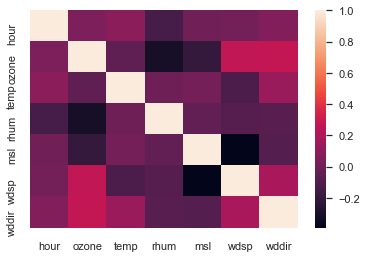

In [910]:
#correlation matrix
sns.heatmap(df.corr());

# XY Plots

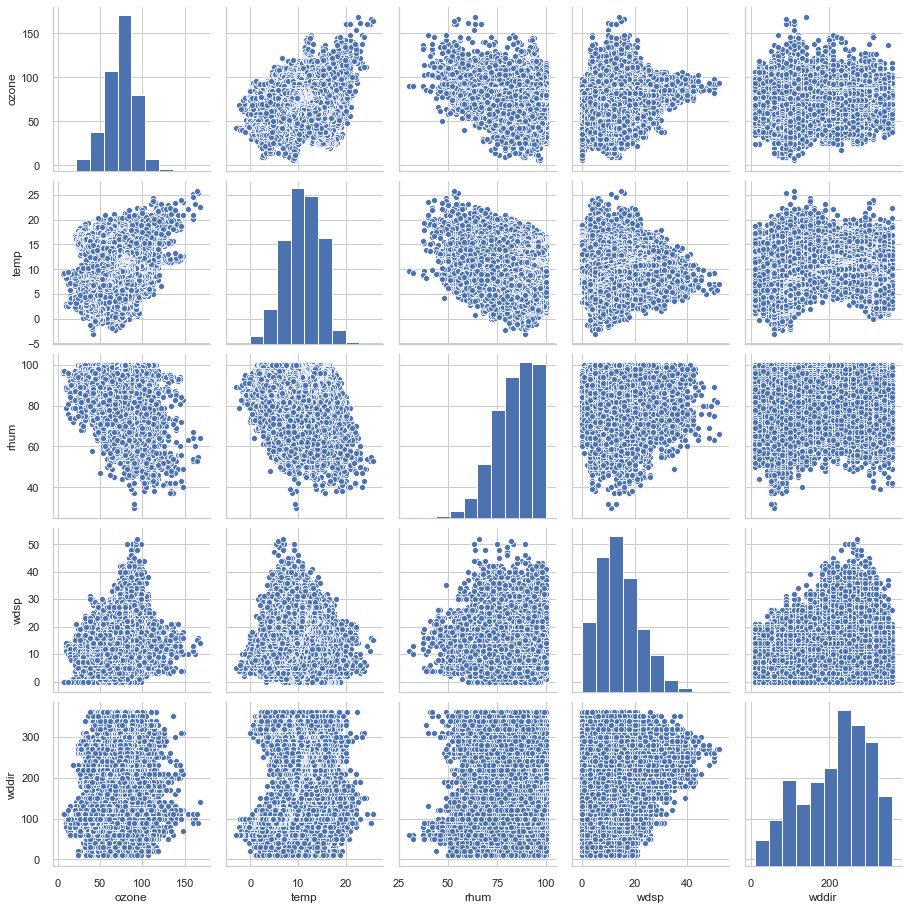

In [911]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['ozone','temp','rhum','wdsp','wddir']].dropna())
plt.show()

# Box Plots

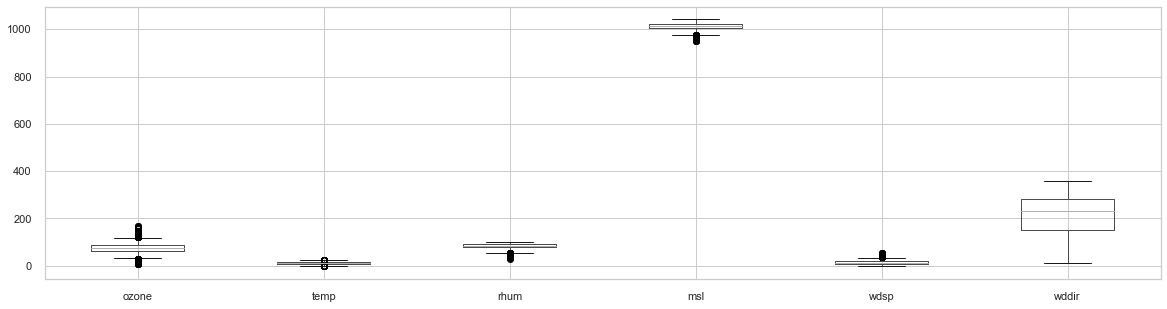

In [912]:
df.loc[:,'ozone':'wddir'].boxplot(figsize=(20,5))
plt.show()

# Histograms

In [913]:
df.isna().sum()

hour       0
ozone    244
temp     408
rhum     408
msl      408
wdsp     408
wddir    414
dtype: int64

# Dopping rows with nan's and missing data

In [914]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [915]:
df.isna().sum()

hour     0
ozone    0
temp     0
rhum     0
msl      0
wdsp     0
wddir    0
dtype: int64

In [916]:
# Print statistical summary for all numerical attributes
df.describe()

,hour,ozone,temp,rhum,msl,wdsp,wddir
count,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000
mean,12.507721,74.679950,10.957693,83.708843,1012.884348,14.289168,212.357483
std,6.921728,17.439624,3.744956,10.568845,13.081577,7.787116,86.013657
min,1.000000,6.000000,-3.100000,30.000000,950.000000,0.000000,10.000000
25%,7.000000,64.000000,8.400000,77.000000,1004.500000,9.000000,150.000000
50%,13.000000,76.000000,11.000000,85.000000,1014.200000,13.000000,230.000000
75%,19.000000,86.000000,13.900000,92.000000,1022.400000,19.000000,280.000000
max,24.000000,168.000000,25.800000,100.000000,1042.000000,52.000000,360.000000


# Histograms 

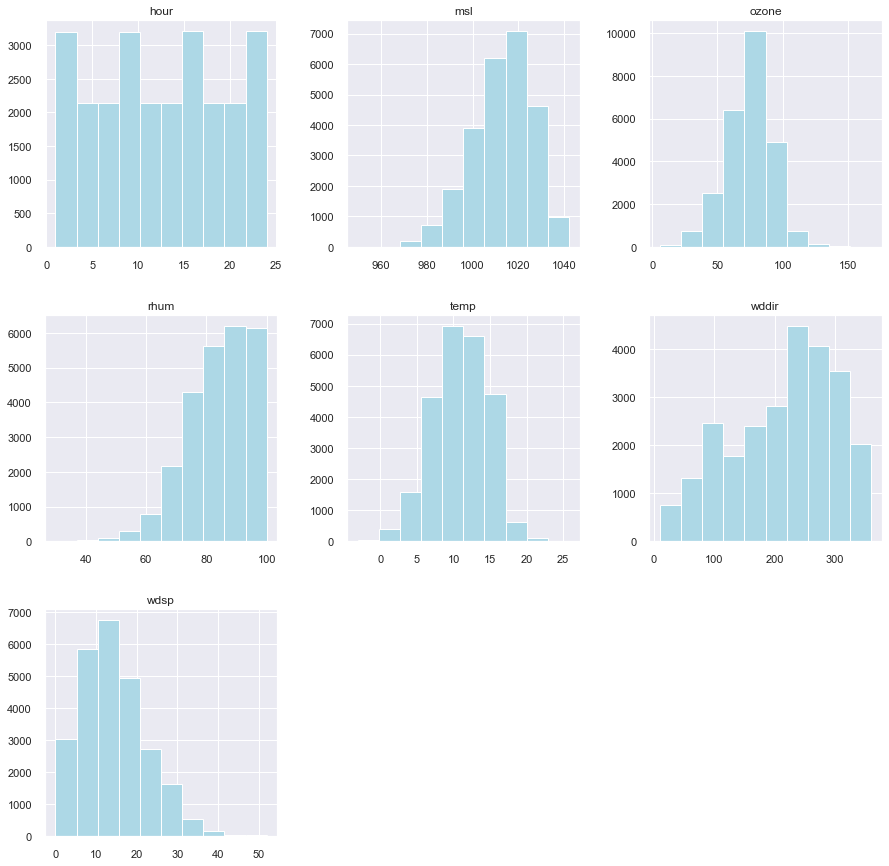

In [917]:
sns.set()
pd.DataFrame.hist(df, figsize = [15,15], color='lightblue')
plt.show()

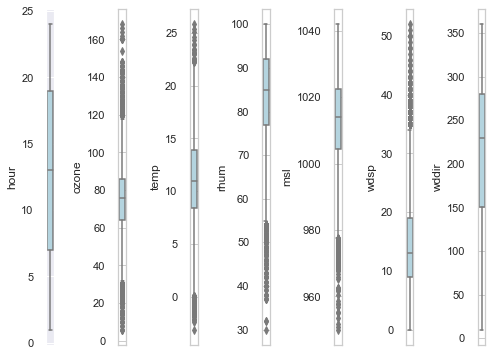

In [918]:

l = df.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='lightblue',orient='v')
    plt.tight_layout()

# Distributions 

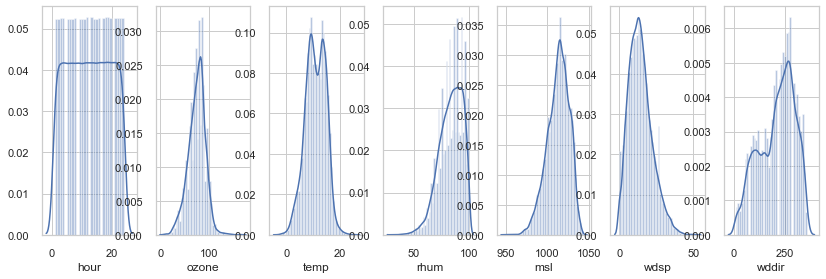

In [919]:

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

# Print statistical summary for all numerical attributes
df.describe()

# Adjustment of data to avoid zero's

In [920]:

df['temp'] = df['temp']+4.20
df['wdsp'] = df['wdsp']+1.00
df['msl'] = df['msl']/1000
df['wddir'] = df['wddir']/360 + 1.00

In [921]:

df['rhum'] = df['rhum']


In [922]:
# Print statistical summary for all numerical attributes
df.describe()

,hour,ozone,temp,rhum,msl,wdsp,wddir
count,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000
mean,12.507721,74.679950,15.157693,83.708843,1.012884,15.289168,1.589882
std,6.921728,17.439624,3.744956,10.568845,0.013082,7.787116,0.238927
min,1.000000,6.000000,1.100000,30.000000,0.950000,1.000000,1.027778
25%,7.000000,64.000000,12.600000,77.000000,1.004500,10.000000,1.416667
50%,13.000000,76.000000,15.200000,85.000000,1.014200,14.000000,1.638889
75%,19.000000,86.000000,18.100000,92.000000,1.022400,20.000000,1.777778
max,24.000000,168.000000,30.000000,100.000000,1.042000,53.000000,2.000000


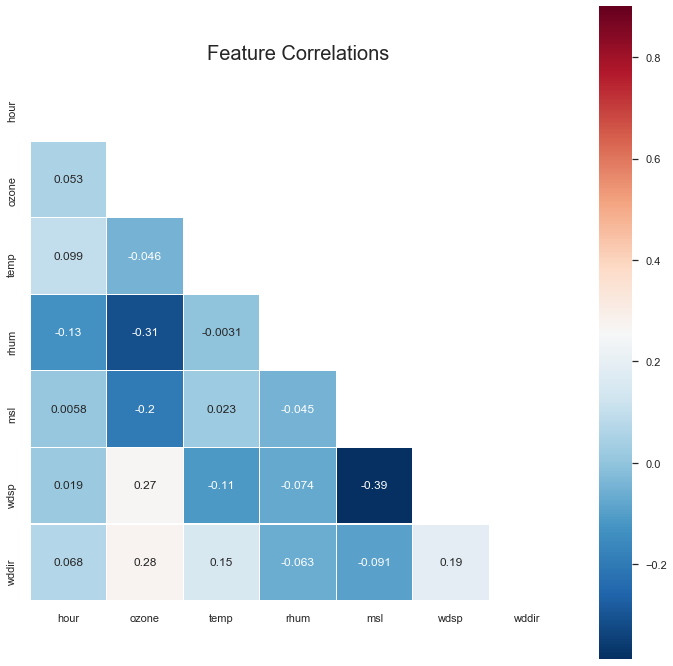

In [923]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Feature Correlations", y = 1.03,fontsize = 20)
plt.show()

In [924]:
# Print first 5 rows of the dataframe
df.dtypes

hour       int64
ozone    float64
temp     float64
rhum     float64
msl      float64
wdsp     float64
wddir    float64
dtype: object

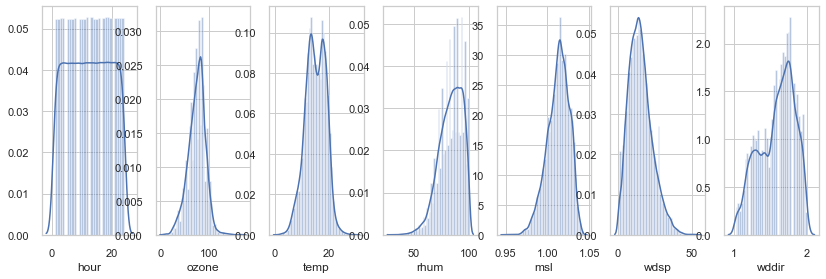

In [925]:

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

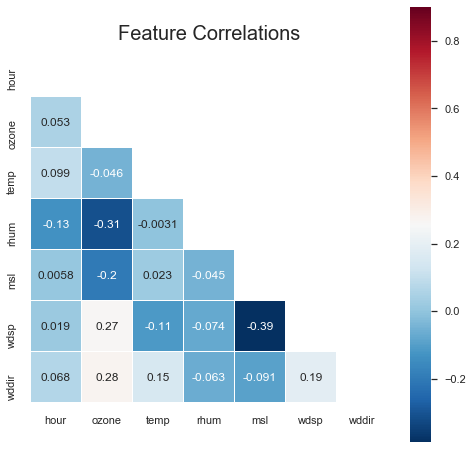

In [966]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Feature Correlations", y = 1.03,fontsize = 20)
plt.show()

In [927]:
# Print statistical summary for all numerical attributes
df.describe()

,hour,ozone,temp,rhum,msl,wdsp,wddir
count,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000,25646.000000
mean,12.507721,74.679950,15.157693,83.708843,1.012884,15.289168,1.589882
std,6.921728,17.439624,3.744956,10.568845,0.013082,7.787116,0.238927
min,1.000000,6.000000,1.100000,30.000000,0.950000,1.000000,1.027778
25%,7.000000,64.000000,12.600000,77.000000,1.004500,10.000000,1.416667
50%,13.000000,76.000000,15.200000,85.000000,1.014200,14.000000,1.638889
75%,19.000000,86.000000,18.100000,92.000000,1.022400,20.000000,1.777778
max,24.000000,168.000000,30.000000,100.000000,1.042000,53.000000,2.000000


## Data Preparation

In [928]:
# store a list with the names of all predictors
names_all = [c for c in df if c not in ['ozone']]

# define column groups with the same data preparation
names_outliers = ['wddir','wdsp','temp','rhum']
names_no_outliers = list(set(names_all) - set(names_outliers))

In [929]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [930]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [931]:
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)

In [932]:
y = df['ozone']
X = df.drop('ozone', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

## Random Forest Regressor

In [933]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', RandomForestRegressor(n_estimators=100))])

In [934]:
N_FEATURES_OPTIONS = [5]
MAX_DEPTH_OPTIONS = [12]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },
]    

search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best CV score = 0.553:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=5, step=1, verbose=0), 'reduce_dim__n_features_to_select': 5, 'regresson__max_depth': 12}


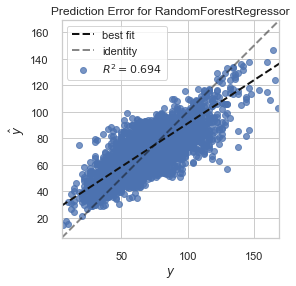

In [935]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Linear Regression

In [936]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])

In [937]:
N_FEATURES_OPTIONS = [8]
NORMALIZE_OPTIONS = [False, True]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
LR_best_params = search.best_params_
LR_best_model = search.best_estimator_

Best CV score = 0.191:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 8, 'regresson__normalize': False}


C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


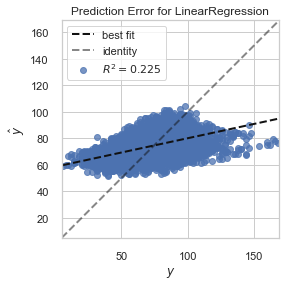

In [938]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## AdaBoost Regressor

In [939]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regression', AdaBoostRegressor())])

In [940]:
N_FEATURES_OPTIONS = [6]
NORMALIZE_OPTIONS = [False, True]
AB_LEARNING_RATES = [0.2]
AB_LOSS = ['linear', 'square', 'exponential']

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regression__learning_rate': AB_LEARNING_RATES,
        'regression__loss': AB_LOSS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')), RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regression__learning_rate': AB_LEARNING_RATES,
        'regression__loss': AB_LOSS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }   
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
AB_best_params = search.best_params_
AB_best_model = search.best_estimator_

C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best CV score = 0.402:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=6, step=1, verbose=0), 'reduce_dim__n_features_to_select': 6, 'regression__learning_rate': 0.2, 'regression__loss': 'exponential'}


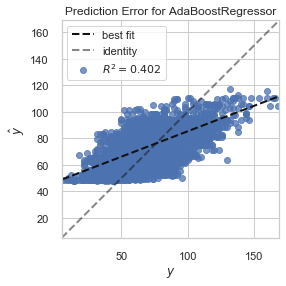

In [941]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


model = AdaBoostRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Gradient Booster

In [942]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', GradientBoostingRegressor())])

In [943]:
N_FEATURES_OPTIONS = [6]
MAX_DEPTH_OPTIONS = [8]

param_grid = [
     {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },
    {
        'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    }

   
]
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
GB_best_params = search.best_params_
GB_best_model = search.best_estimator_

C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best CV score = 0.538:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=6, step=1, verbose=0), 'reduce_dim__n_features_to_select': 6, 'regresson__max_depth': 8}


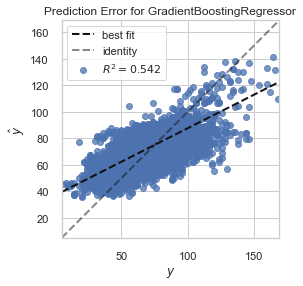

In [944]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


model = GradientBoostingRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## SVR

In [945]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR ())])

In [946]:
KERNEL = ['linear']
C = [300]
GAMMA = ['auto']
N_FEATURES_OPTIONS = [6]


param_grid = [
     {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },
    {
        'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVR_best_params = search.best_params_
SVR_best_model = search.best_estimator_


C:\Users\0110900s\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best CV score = 0.466:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=6,
               noise_variance_init=None, random_state=0, svd_method='lapack',
               tol=0.01), 'reduce_dim__n_components': 6}


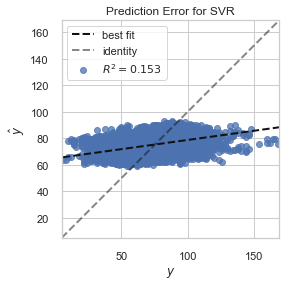

In [947]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


model = SVR()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [948]:
from sklearn.neural_network import MLPRegressor

In [949]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])

In [950]:
ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
HIDDEN_LAYER_SIZES = [(5),(10,10),(7,7,7)] 
SOLVER = ['lbfgs'] 
ACTIVATION = ['relu', 'tanh'] 
LEARNING_RATE = ['invscaling']
N_FEATURES_OPTIONS = [6]
MAX_ITER = [500]


param_grid = [
     {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },
    {
        'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },

]
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
MLP_best_params = search.best_params_
MLP_best_model = search.best_estimator_

C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best CV score = 0.488:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=6,
               noise_variance_init=None, random_state=0, svd_method='lapack',
               tol=0.01), 'reduce_dim__n_components': 6}


C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


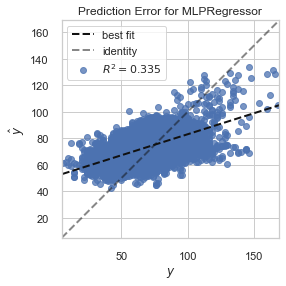

In [951]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


model = MLPRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## ANN

In [952]:
from sklearn.neural_network import MLPRegressor

In [953]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])

In [954]:
ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
SOLVER = ['adam'] 
ACTIVATION = ['relu','tanh','identity','logistic'] 
LEARNING_RATE = ['constant','invscaling','adaptive']
N_FEATURES_OPTIONS = [10]
MAX_ITER = [500]

param_grid = [
     {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },
    {
        'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    },

]
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
MLP_best_params = search.best_params_
MLP_best_model = search.best_estimator_

C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best CV score = 0.487:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
               noise_variance_init=None, random_state=0, svd_method='lapack',
               tol=0.01), 'reduce_dim__n_components': 10}


C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Users\0110900s\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


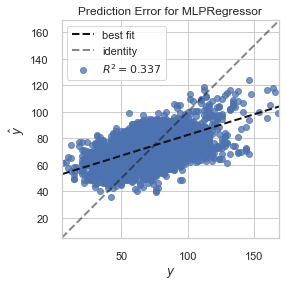

In [955]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


model = MLPRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Plotting data

In [956]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])

In [957]:
# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
          
    return _mse, _mae, _r2, _meae

In [958]:
RF_mse, RF_mae, RF_r2, RF_meae = evaluate_model(X_test, y_test, RF_best_model)
LR_mse, LR_mae, LR_r2, LR_meae = evaluate_model(X_test, y_test, LR_best_model)
AB_mse, AB_mae, AB_r2, AB_meae = evaluate_model(X_test, y_test, AB_best_model)
GB_mse, GB_mae, GB_r2, GB_meae = evaluate_model(X_test, y_test, GB_best_model)
SVR_mse, SVR_mae, SVR_r2, SVR_meae = evaluate_model(X_test, y_test, SVR_best_model)
MLP_mse, MLP_mae, MLP_r2, MLP_meae = evaluate_model(X_test, y_test, MLP_best_model)

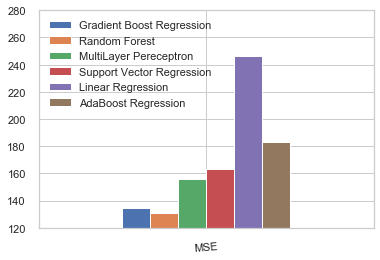

In [964]:
AB_metrics = np.array([AB_mse])
RF_metrics = np.array([RF_mse])
LR_metrics = np.array([LR_mse])
GB_metrics = np.array([GB_mse])
SVR_metrics = np.array([SVR_mse])
MLP_metrics = np.array([MLP_mse])
index = ['MSE']
df_metrics = pd.DataFrame({'Gradient Boost Regression': GB_metrics,'Random Forest': RF_metrics, 'MultiLayer Pereceptron':MLP_metrics,'Support Vector Regression':SVR_metrics,'Linear Regression': LR_metrics, 'AdaBoost Regression': AB_metrics,  }, index=index)
df_metrics.plot.bar(rot=5);plt.ylim((120,280))
plt.legend(loc="upper left")
plt.show()

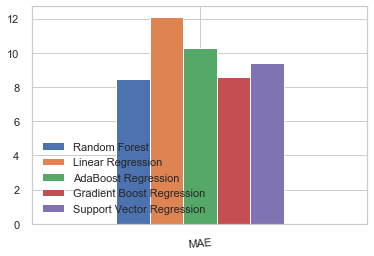

In [960]:
AB_metrics = np.array([AB_mae])
RF_metrics = np.array([RF_mae])
LR_metrics = np.array([LR_mae])
GB_metrics = np.array([GB_mae])
SVR_metrics = np.array([SVR_mae])
index = ['MAE']
df_metrics = pd.DataFrame({'Random Forest': RF_metrics, 'Linear Regression': LR_metrics, 'AdaBoost Regression': AB_metrics,'Gradient Boost Regression': GB_metrics,'Support Vector Regression':SVR_metrics}, index=index)
df_metrics.plot.bar(rot=5)
plt.legend(loc="lower left")
plt.show()

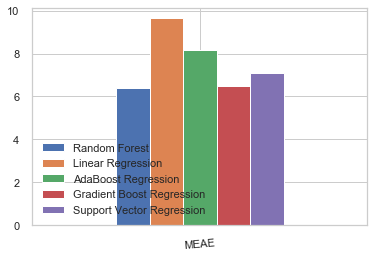

In [961]:
AB_metrics = np.array([AB_meae])
RF_metrics = np.array([RF_meae])
LR_metrics = np.array([LR_meae])
GB_metrics = np.array([GB_meae])
SVR_metrics = np.array([SVR_meae])
index = ['MEAE']
df_metrics = pd.DataFrame({'Random Forest': RF_metrics, 'Linear Regression': LR_metrics, 'AdaBoost Regression': AB_metrics,'Gradient Boost Regression': GB_metrics,'Support Vector Regression':SVR_metrics}, index=index)
df_metrics.plot.bar(rot=5)
plt.legend(loc="lower left")
plt.show()

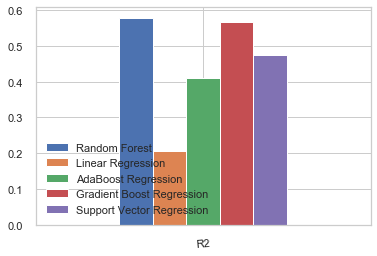

In [962]:
AB_metrics = np.array([AB_r2])
RF_metrics = np.array([RF_r2])
LR_metrics = np.array([LR_r2])
GB_metrics = np.array([GB_r2])
SVR_metrics = np.array([SVR_r2])
index = ['R2']
df_metrics = pd.DataFrame({'Random Forest': RF_metrics, 'Linear Regression': LR_metrics, 'AdaBoost Regression': AB_metrics,'Gradient Boost Regression': GB_metrics, 'Support Vector Regression':SVR_metrics}, index=index)
df_metrics.plot.bar(rot=5)
plt.legend(loc="lower left")
plt.show()

## Station Name: DUBLIN AIRPORT
### Station Height: 71 M 
### Latitude:53.428  ,Longitude: -6.241


###### date:  -  Date and Time (utc)
###### rain:  -  Precipitation Amount (mm)	  
###### temp:  -  Air Temperature (C)	
###### wetb:  -  Wet Bulb Temperature (C)
###### dewpt: -  Dew Point Temperature (C)             
###### rhum:  -  Relative Humidity (%)
###### vappr: -  Vapour Pressure (hPa)	 
###### msl:   -  Mean Sea Level Pressure (hPa)
###### wdsp:  -  Mean Wind Speed (knot)
###### wddir: -  Predominant Wind Direction (degree)
###### ww:    -  Synop code for Present Weather
###### w:     -  Synop code for Past Weather
###### sun:   -  Sunshine duration (hours)
###### vis:   -  Visibility (m)
###### clht:  -  Cloud height (100's of ft) - 999 if none 
###### clamt: -  Cloud amount
###### ind:   -  Indicator

## Indicators (i)	    Description  - Decode                                                        

irain    Rainfall Indicators:		
                        0. satisfactory. 
	                    1. deposition. 
				        2. trace or sum of precipition. 
				        3. trace or sum of deposition. 
						4. estimate precipitation. 
                        5 estimate deposition. 
						6. estimate trace of precipitation.

itemp		Temperature Indicators: 	
                        0. positive. 
						1. negative. 
						2. positive estimated. 	
						3. negative estimated. 
						4. not available. 

iwb  		Wet Bulb Indicators:    	
                        0:positive. 
						1. negative. 
						2. positive estimated. 
						3. negative estimated. 
				        4. not available. 
						5. frozen negative.

iwdsp		Wind Speed Indicators:		
                        2. Over 60 minutes. 
						4. Over 60 minutes and defective
						6 Over 60 minutes and partially defective. 
						7. n/a

iwddir		Wind Direction Indicators:  	
                        2. Over 60 minutes. 
						4. Over 60 minutes and defective
						6 Over 60 minutes and partially defective. 
						7. n/a

























# GRADIENT BOOSTING

In [74]:

# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     GB_best_params.get('reduce_dim'),
                     GradientBoostingRegressor(n_estimators=10, **transform(GB_best_params, 'regresson__')))

final_model =pipe.fit(X, y)

In [75]:
import sys
filename = 'final_model_GB.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [76]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6815657587530284


# Linear Regression

In [295]:

# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     LR_best_params.get('reduce_dim'),
                     LinearRegression(**transform(LR_best_params, 'regresson__')))

final_model =pipe.fit(X, y)

In [296]:
import sys
filename = 'final_model_LR.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [297]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6789667738611674


# Random Forest

In [298]:
# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     RF_best_params.get('reduce_dim'),
                     RandomForestRegressor(**transform(RF_best_params, 'regresson__')))

final_model =pipe.fit(X, y)

In [299]:
import sys
filename = 'final_model_RF.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [300]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9683741372910405


# AdaBoostRegressor

In [301]:
# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     AB_best_params.get('reduce_dim'),
                     AdaBoostRegressor(**transform(AB_best_params, 'regresson__')))

final_model =pipe.fit(X, y)

In [302]:
import sys
filename = 'final_model_AB.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [303]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6275625651105141


# SVR

In [304]:
# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     SVR_best_params.get('reduce_dim'),
                     SVR(**transform(SVR_best_params, 'regresson__')))

final_model =pipe.fit(X, y)

In [305]:
import sys
filename = 'final_model_SVR.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [306]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7470870385361161
